### Add the scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

c:\Users\yeget\-End-To-End-Credit-Risk-Probability-Model-\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the Data

In [4]:
PATH = "../data/raw/data.csv"

data = pd.read_csv(PATH)
data_copy = data.copy()

In [5]:
data.shape

(95662, 16)

In [6]:
#seeing the first five rows of the data
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Start of Feature Engineering

In [7]:
from scripts.feature_engineering import FeatureEngineering

# Step 1 - Extract Date Features

In [8]:
data_copy = FeatureEngineering.extract_date_features(data=data_copy)

In [9]:
#check the first five rows after extracting date features
data_copy.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionStartTime,PricingStrategy,FraudResult,Hour,Day,Month,Year,Weekday,IsWeekend,IsBusinessHour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2018-11-15 05:18:49+03:00,2,0,5,15,11,2018,3,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15 05:19:08+03:00,2,0,5,15,11,2018,3,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2018-11-15 05:44:21+03:00,2,0,5,15,11,2018,3,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2018-11-15 06:32:55+03:00,2,0,6,15,11,2018,3,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15 06:34:21+03:00,2,0,6,15,11,2018,3,0,0


In [10]:
data_copy.shape 

(95662, 23)

## As seen from the above output the date features have been successfully extracted. We now have  the local time zone information broken down into Hour, Day, Month and Year, Weekday, IsWeekend, IsBusinessHour features. We have successfuly added 7 features

# Step 2 - Numerical aggregations per customer

In [11]:
data_aggregated_features = FeatureEngineering.aggregate_customer_data(data=data_copy)

In [12]:
data_aggregated_features.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TotalCredit,CountDebits,CountCredits,MaxDebit,MaxCredit,FraudPercentage,NetFlow,ValuePerTxn,FractionCredits,CV_Value
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,46962.25,66,53,20000.0,5000.0,0.0,109921.75,1713.000000,0.445378,1.561715
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,46962.25,66,53,20000.0,5000.0,0.0,109921.75,1713.000000,0.445378,1.561715
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,-0.00,2,0,500.0,NaN,0.0,1000.00,500.000000,0.000000,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,22272.80,26,12,100000.0,10000.0,0.0,228727.20,7542.710526,0.315789,2.345497
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,22272.80,26,12,100000.0,10000.0,0.0,228727.20,7542.710526,0.315789,2.345497


# Step 3 - Handle Missing Values

In [13]:
data_aggregated_features.isnull().sum()

TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
Hour                       0
Day                        0
Month                      0
Year                       0
Weekday                    0
IsWeekend                  0
IsBusinessHour             0
TransactionCount           0
TotalValue                 0
AvgValue                   0
MedianValue                0
StdValue                 712
P75Value                   0
P90Value                   0
TotalDebit                 0
TotalCredit                0
CountDebits                0
CountCredits               0
MaxDebit      

In [14]:
data_aggregated_features.isna().sum()

TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
Hour                       0
Day                        0
Month                      0
Year                       0
Weekday                    0
IsWeekend                  0
IsBusinessHour             0
TransactionCount           0
TotalValue                 0
AvgValue                   0
MedianValue                0
StdValue                 712
P75Value                   0
P90Value                   0
TotalDebit                 0
TotalCredit                0
CountDebits                0
CountCredits               0
MaxDebit      

## From the output we can see that we having missing values for coulmns- max credit , maxDebit, std values and cv_values. These missing values are due to customers not having any credit or debit transactions. We will impute these missing values with 0 since if a customer has no credit transactions then their max credit is 0. Similarly for debit transactions. For std values and cv_values we will impute with 0 as well since if there is only one transaction the std deviation is 0 and cv_value will also be 0.

In [15]:
data_with_no_missing = FeatureEngineering.handle_missing_data(data=data_aggregated_features)

Missing values before imputation:
TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
Hour                       0
Day                        0
Month                      0
Year                       0
Weekday                    0
IsWeekend                  0
IsBusinessHour             0
TransactionCount           0
TotalValue                 0
AvgValue                   0
MedianValue                0
StdValue                 712
P75Value                   0
P90Value                   0
TotalDebit                 0
TotalCredit                0
CountDebits                0
CountCred

## As seen above we have successfully imputed the missing values with 0. There are no more missing values in the dataset.

# Step 4 - Final Feature Set - Drop Unnecessary Columns

In [16]:
data_with_no_missing.shape


(95662, 41)

In [17]:
data_with_no_missing.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TotalCredit,CountDebits,CountCredits,MaxDebit,MaxCredit,FraudPercentage,NetFlow,ValuePerTxn,FractionCredits,CV_Value
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,46962.25,66,53,20000.0,5000.0,0.0,109921.75,1713.000000,0.445378,1.561715
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,46962.25,66,53,20000.0,5000.0,0.0,109921.75,1713.000000,0.445378,1.561715
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,-0.00,2,0,500.0,0.0,0.0,1000.00,500.000000,0.000000,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,22272.80,26,12,100000.0,10000.0,0.0,228727.20,7542.710526,0.315789,2.345497
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,22272.80,26,12,100000.0,10000.0,0.0,228727.20,7542.710526,0.315789,2.345497


In [18]:
feature_set = FeatureEngineering.select_features(data=data_with_no_missing)

In [19]:
feature_set.head()

,TransactionStartTime,Hour,Day,Month,Year,Weekday,IsWeekend,IsBusinessHour,TransactionCount,TotalValue,...,TotalCredit,CountDebits,CountCredits,MaxDebit,MaxCredit,NetFlow,ValuePerTxn,FractionCredits,CV_Value,CustomerId
0,2018-11-15 05:18:49+03:00,5,15,11,2018,3,0,0,119,203847,...,46962.25,66,53,20000.0,5000.0,109921.75,1713.000000,0.445378,1.561715,CustomerId_4406
1,2018-11-15 05:19:08+03:00,5,15,11,2018,3,0,0,119,203847,...,46962.25,66,53,20000.0,5000.0,109921.75,1713.000000,0.445378,1.561715,CustomerId_4406
2,2018-11-15 05:44:21+03:00,5,15,11,2018,3,0,0,2,1000,...,-0.00,2,0,500.0,0.0,1000.00,500.000000,0.000000,0.000000,CustomerId_4683
3,2018-11-15 06:32:55+03:00,6,15,11,2018,3,0,0,38,286623,...,22272.80,26,12,100000.0,10000.0,228727.20,7542.710526,0.315789,2.345497,CustomerId_988
4,2018-11-15 06:34:21+03:00,6,15,11,2018,3,0,0,38,286623,...,22272.80,26,12,100000.0,10000.0,228727.20,7542.710526,0.315789,2.345497,CustomerId_988


In [20]:
feature_set.shape

(95662, 26)

In [21]:
# let's see the columns and the data types of the feature set
feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype                         
---  ------                --------------  -----                         
 0   TransactionStartTime  95662 non-null  datetime64[ns, Africa/Kampala]
 1   Hour                  95662 non-null  int32                         
 2   Day                   95662 non-null  int32                         
 3   Month                 95662 non-null  int32                         
 4   Year                  95662 non-null  int32                         
 5   Weekday               95662 non-null  int32                         
 6   IsWeekend             95662 non-null  int64                         
 7   IsBusinessHour        95662 non-null  int64                         
 8   TransactionCount      95662 non-null  int64                         
 9   TotalValue            95662 non-null  int64                         
 10

## The output above shows us that our feature set consists entirely of numerical  but isWeekend and isBusinessHour are more categorical in nature (binary)

In [22]:
feature_set["NetFlow"].describe()

count    9.566200e+04
mean    -3.599090e+06
std      2.180271e+07
min     -1.049000e+08
25%      6.000000e+04
50%      2.015113e+05
75%      7.089360e+05
max      8.345124e+07
Name: NetFlow, dtype: float64

# Step 5 - Feature Transformation - Normalization/Standardization of Features

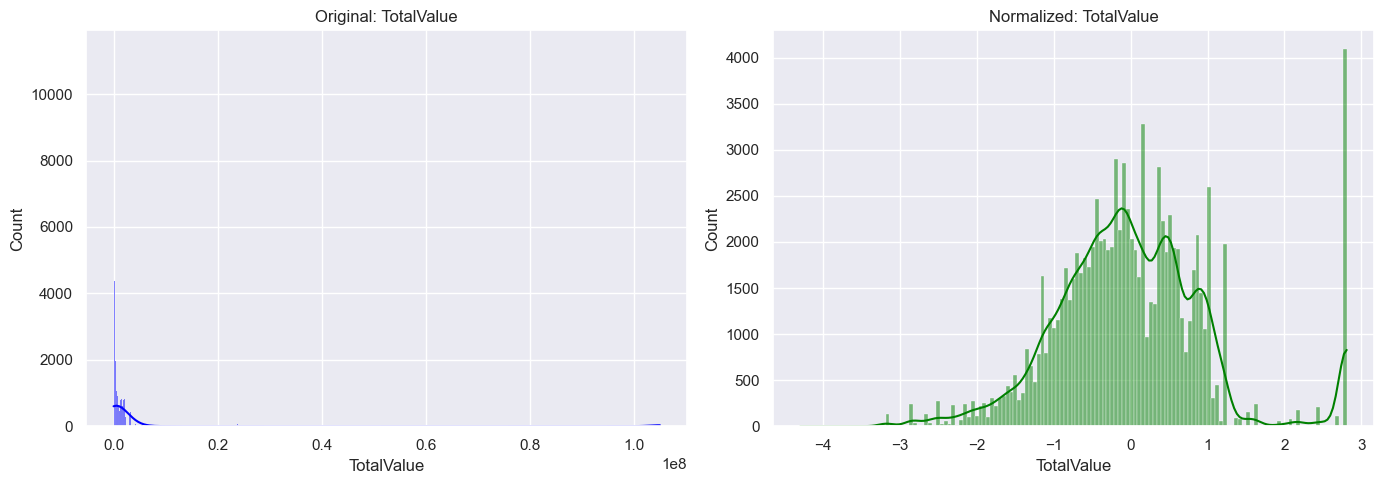

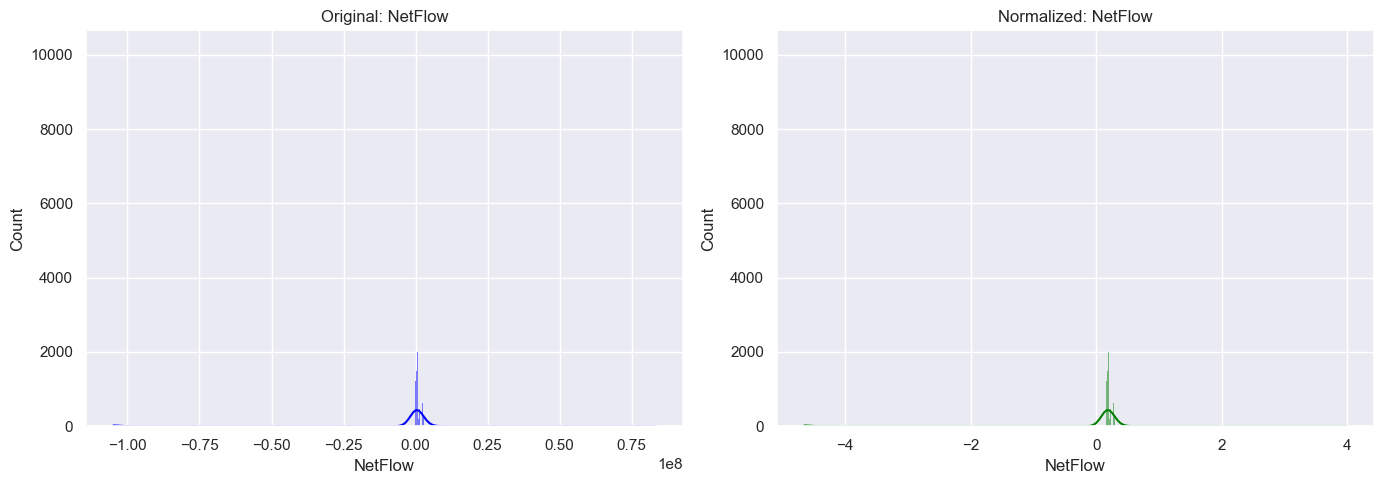

In [23]:
normalized_feature_set, preprocessor = FeatureEngineering.normalize_numerical_features(feature_set)

# Compare a skewed feature (e.g., TotalValue)
FeatureEngineering.plot_distribution_comparison(feature_set, normalized_feature_set, 'TotalValue')

# Compare a negative/flow feature (e.g., NetFlow)
FeatureEngineering.plot_distribution_comparison(feature_set, normalized_feature_set, 'NetFlow')

In [24]:
normalized_feature_set["NetFlow"].describe()

count     95662.000000
unique     1799.000000
top          -4.646278
freq       4091.000000
Name: NetFlow, dtype: float64

## Froom the Plots and the data.describe we can see that the normalization has helped in reducing the skewness of the data. The features are now more normally distributed which is beneficial for many machine learning algorithms.

In [25]:
normalized_feature_set.head()

,TransactionCount,TotalValue,AvgValue,MedianValue,StdValue,P75Value,P90Value,TotalDebit,TotalCredit,CountDebits,...,FractionCredits,Hour,Day,Month,Year,Weekday,IsWeekend,IsBusinessHour,CustomerId,TransactionStartTime
0,0.115536,-0.242761,-0.673446,-0.473154,-0.412447,-0.393973,-0.221187,0.05616,0.386047,0.25273,...,0.278047,5,15,11,2018,3,0,0,CustomerId_4406,2018-11-15 05:18:49+03:00
1,0.115536,-0.242761,-0.673446,-0.473154,-0.412447,-0.393973,-0.221187,0.05616,0.386047,0.25273,...,0.278047,5,15,11,2018,3,0,0,CustomerId_4406,2018-11-15 05:19:08+03:00
2,-2.147,-2.842683,-1.838305,-1.080796,-5.817683,-1.571934,-2.334925,-1.563587,-3.547891,-1.676541,...,-2.404102,5,15,11,2018,3,0,0,CustomerId_4683,2018-11-15 05:44:21+03:00
3,-0.573815,-0.076097,0.729982,0.134927,0.88112,0.681037,0.608667,0.206756,0.113247,-0.311785,...,-0.502359,6,15,11,2018,3,0,0,CustomerId_988,2018-11-15 06:32:55+03:00
4,-0.573815,-0.076097,0.729982,0.134927,0.88112,0.681037,0.608667,0.206756,0.113247,-0.311785,...,-0.502359,6,15,11,2018,3,0,0,CustomerId_988,2018-11-15 06:34:21+03:00


In [26]:
normalized_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype                         
---  ------                --------------  -----                         
 0   TransactionCount      95662 non-null  object                        
 1   TotalValue            95662 non-null  object                        
 2   AvgValue              95662 non-null  object                        
 3   MedianValue           95662 non-null  object                        
 4   StdValue              95662 non-null  object                        
 5   P75Value              95662 non-null  object                        
 6   P90Value              95662 non-null  object                        
 7   TotalDebit            95662 non-null  object                        
 8   TotalCredit           95662 non-null  object                        
 9   CountDebits           95662 non-null  object                        
 10

# Our final feaure set has 26 columns and 95662 rows . No rows were dropped during the feature engineering process.

In [27]:
# Our last step is to save the processed feature set for future modeling.
output_path = "../data/processed/normalized_feature_set.csv"
normalized_feature_set.to_csv(output_path, index=False)
print(f"Normalized feature set saved to {output_path}")

Normalized feature set saved to ../data/processed/normalized_feature_set.csv
